Las redes Neuronales Convolucionales se especializan en la deteccion y visualizacion de imagenes.

Estas redes intentan simular lo que hace la vision y analisis humano para reconocer diferentes formas, texturas, colores, bordes, patrones, etc.


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

Vamos a cargar la data y llevarla a las variables de entrenamiento y de test

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Analisis exploratorio

In [3]:
train_images.shape #60k imagenes de 28 x 28 pixeles

(60000, 28, 28)

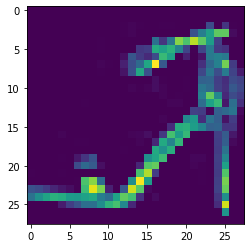

In [4]:
plt.imshow(train_images[8]) #Vemos que son imagenes de ropa

Vamos a limpiar los datos.
Lo primero sera reescalar los valores del set de entrenamiento.

In [5]:
train_images = train_images.astype('float32') / 255 #Reescalar los valores. Sobre 255 porque los pixeles que manejan las imagenes son de 0 a 255
test_image = test_images.astype('float32') / 255 #...y las redes neuronales se entienden mejor con numeros pequenos como decimales

In [6]:
train_images = train_images.reshape(train_images.shape[0],28,28,1) #Vuelve las imagenes de 28 * 28 que este en 1 canal
test_images = test_images.reshape(test_images.shape[0],28,28,1)

train_labels esta compuesto por enteros.
Queremos llevar todos los valores de train_labels a un solo array de 0s y 1s de la cantidad de posibles opciones. Para eso se usa to_categorical(), con 10 posibles opciones (esto ultimo basado en la documentacion)


In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

Ahora vamos a crear nuestro modelo de datos

In [8]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))  #Etapa de convolucion.
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))  #capa para reducir el overfiting
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')) #Etapa de convolucion pero sin input shape, ya que esto lo da la capa anterior
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten()) #aplana la matriz o tensor para que queden en serie
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) #Esta capa es de 10 porque son 10 posibles salidas
model.summary()

2023-01-19 12:03:04.969139: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 12:03:04.970049: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 12:03:05.096385: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 12:03:05.097328: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 12:03:05.098064: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

Ya tenemos el modelo de la red convolucional.
Ahora se va a compilar y entrenar la red neuronal convolucional

In [9]:
model.compile(loss='categorical_crossentropy',  #Categorical porque tiene mas de 2 posibles salidas. 10
             optimizer = 'rmsprop',
             metrics=['accuracy']
             ) 

In [10]:
history = model.fit(train_images, train_labels, batch_size = 654, epochs = 100)

2023-01-19 12:03:09.563890: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-01-19 12:03:11.417585: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


92/92 [==============================] - 11s 23ms/step - loss: 0.8709 - accuracy: 0.6757
Epoch 2/100
92/92 [==============================] - 2s 21ms/step - loss: 0.5270 - accuracy: 0.8062
Epoch 3/100
92/92 [==============================] - 2s 21ms/step - loss: 0.4525 - accuracy: 0.8361
Epoch 4/100
92/92 [==============================] - 2s 21ms/step - loss: 0.4108 - accuracy: 0.8516
Epoch 5/100
92/92 [==============================] - 2s 21ms/step - loss: 0.3820 - accuracy: 0.8604
Epoch 6/100
92/92 [==============================] - 2s 22ms/step - loss: 0.3623 - accuracy: 0.8690
Epoch 7/100
92/92 [==============================] - 2s 21ms/step - loss: 0.3467 - accuracy: 0.8735
Epoch 8/100
92/92 [==============================] - 2s 21ms/step - loss: 0.3316 - accuracy: 0.8790
Epoch 9/100
92/92 [==============================] - 2s 21ms/step - loss: 0.3199 - accuracy: 0.8840
Epoch 10/100
92/92 [==============================] - 2s 22ms/step - loss: 0.3106 - accuracy: 0.8863
Epoch 11/1

In [11]:
model.evaluate(test_images, test_labels, verbose=0)

[69.9683609008789, 0.8435999751091003]

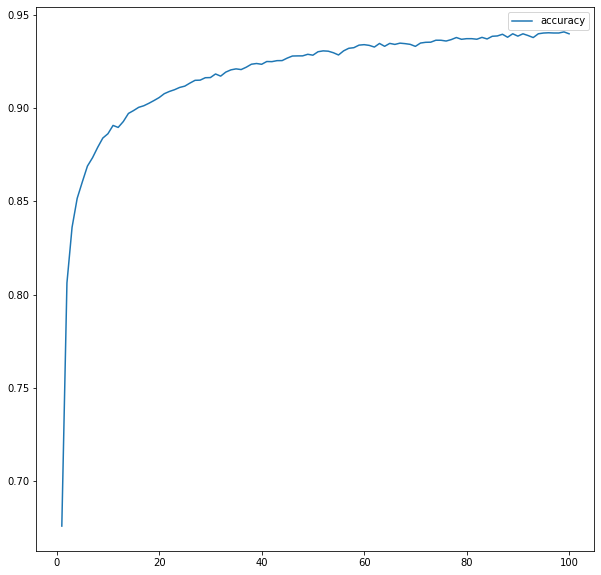

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['accuracy']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, loss_values, '-', label = 'accuracy')
plt.legend()
plt.show()